<a href="https://colab.research.google.com/github/atharvapatil123/COCWebsite/blob/master/Regression/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Theory

Have multiple Features

y = b0 + b1\*x1 + b2\*x2 + ... + bn*xn

*We don't apply FEATURE SCALING in this, as the coeff compensate with the featues and so brings them in a range*

**Assumptions of Linear Regression:**

1.**Linearity**: There must be a linear relationship(straight-line) between the dependent and independent variables.

2.**Homoscedasticity**: Since your regression model never exactly predicts your dependent variable in practice, you always have an error. Now you can plot your dependent variable on the x axis and the error on the y axis.

3.Multivariate normality

4.Independence of errors

5.Lack of **multicollinearity**: In multicollinearity, two or more of the predictors correlate strongly with each other.


**Categorical Variable**: Place 1's and 0's adding an extra column each time a new row value is encountered (**Dummy Variables**)

Numerical Variable: Those with numerical values

y = b0 + b1\*x1 + b2\*x2 + b3\*x3 + b4\*D1

Here, b0 = California, and 

b4 = New York - California

So, Number of Dummy variables formed 

= No of characteristics - 1 

Else, it causes **Dummy variable Trap**, which induces multicollinearity, as both the dummy variables effect are strongly dependent on each other.
Thus, we always omit one dummy variable.

**Statistical SIgnificance**

If it goes beyond a value, our assumption is wrong, so reject NULL hypothesis

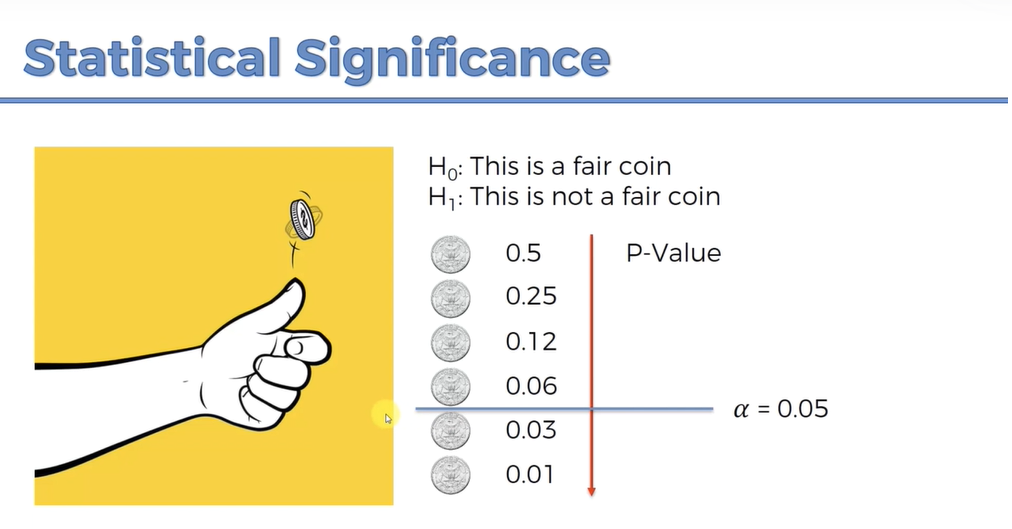


If the p-value for a variable is less than your significance level, your sample data provide enough evidence to reject the null hypothesis for the entire population. Your data favor the hypothesis that there is a non-zero correlation. Changes in the independent variable are associated with changes in the dependent variable at the population level. This variable is statistically significant and probably a worthwhile addition to your regression model.

On the other hand, a p-value that is greater than the significance level indicates that there is insufficient evidence in your sample to conclude that a non-zero correlation exists.

https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression

5 methods of building models

1. **All-in**: Use all the variables

> Prior Knowledge

> You have to

> Preparing for backward elimination

2. **Backward Elimination**:  FASTEST

> Select a significance level to stay in the model(e.g. SL=0.05)

> Fit the full model with all possible predictors

> Consider the predictor with highest P-value. If P>SL, go to next step, else FINISH

> Remove the predictor

> Fit model without this variable*

3. **Forward Selection**

> Select a significance level to enter in the model(e.g. SL=0.05)

> Fit all simple regression models y ~ xn(i.e. create different regression models for each independent-dependent variable pair). Select the one with lowest P-value

> Keep this variable and fit all possible models with one extra predictor added to the one(s) you already have.

> Consider the predictor with lowest P-value. If P < SL, go to previous step, else FINISH and keep the previous model

4. **Bidirectional Elimination**

> Select a significance level to enter and to stay in the model e.g. SLENTER = 0.05, SLSTAY = 0.05

> Perform the next step of Forward Selection(new variables must have P < SLENTER to enter)

> Perform all steps of Backward Selection(old variables must have P > SLSTAY to stay). Then go to previos step

> No new variables can enter and no old variables can exit.(Your model is ready)

STEPWISE REGRESSION 2-4

5. **All Possible Models:** Constuct All possible regression models with 2^N - 1 total combinations

6. **Score Comparison**

## Implementation

In [ ]:
# Importing libraries
# -------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [3])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
print(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

In [ ]:
print((x_train))

Training the Multiple Linear Regression model on the Traiing Set

> The Multiple Regression Class itself avoids The Dummy Variable Trap



In [ ]:
from sklearn.linear_model import LinearRegression
# The class takes care of everything, starting from selecting the best feature for backward elimination to avoiding Dummy variables trap
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
print(y_pred.reshape(len(y_pred), 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
[[103015.2 ]
 [132582.28]
 [132447.74]
 [ 71976.1 ]
 [178537.48]
 [116161.24]
 [ 67851.69]
 [ 98791.73]
 [113969.44]
 [167921.07]]
